In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import os
import unicodedata
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import seaborn as sns
import scipy.stats as stats
sns.set(font_scale=1)
sns.set_style("white")
sns.set_style("ticks")
import plotly.express as px
from geopy.geocoders import Nominatim
import unicodedata
import time
from tqdm import tqdm
import re
from googletrans import Translator
import io
import msoffcrypto
from starlette.config import Config

config = Config("../../../../../.env")
pw = config("HASEKO_DATA_PW", cast=str)
translator = Translator()

In [2]:
def convert_float_to_int(x):
    try:
        if x.is_integer():
            return int(x)
    except:
        return x

In [3]:
data_dir = '../data/統計データ231023.xlsx'
df = pd.read_excel(data_dir, sheet_name=0)

# Normal mansion price

In [4]:
df1 = pd.read_excel(data_dir, sheet_name=1, header=1).iloc[:-3,2:-3]
df1['都道府県'].fillna(method='ffill', inplace=True)
df1['市区'] = df1['市区'].fillna(df1['都道府県'])
df1.set_index(['都道府県', '市区'], inplace=True)
df1 = df1.fillna(0).applymap(convert_float_to_int)
df1

4,000万円未満  4,000万円以上5,000万円未満  5,000万円以上6,000万円未満  \
都道府県    市区                                                           
東京都     江東区             35                  53                  75   
        練馬区             54                 109                  72   
        江戸川区            20                  88                  92   
        北区　             89                  36                  29   
        台東区             80                  68                  23   
        新宿区              9                  22                  14   
        品川区             11                  26                  31   
        中央区             14                  12                  26   
        世田谷区             7                  20                  30   
        港区　              7                   6                   9   
        荒川区             28                  40                  41   
        文京区              9                  26                   4   
        大田区             29                  19                  33   
        足立区             37                  53                  16   
        板橋区             25                  21                  43   
        渋谷区              4                   3                   5   
        豊島区              7                   8                   8   
        墨田区             34                  33                  17   
        杉並区             22                  11                  16   
        中野区              8                  12                  15   
        目黒区              4                   3                   4   
        葛飾区              9                  22                  15   
        千代田区             6                  14                   0   
        23区外           316                 264                 149   
東京都 集計  東京都 集計         864                 969                 767   
神奈川県    横浜市            184                 233                 182   
        川崎市             93                 120                  77   
        その他            153                 163                  99   
神奈川県 集計 神奈川県 集計        430                 516                 358   
千葉県 集計  千葉県 集計         271                 207                  47   

                 6,000万円以上7,000万円未満  7,000万円以上8,000万円未満  8,000万円以上9,000万円未満  \
都道府県    市区                                                                    
東京都     江東区                      77                  42                  23   
        練馬区                      39                  10                   8   
        江戸川区                     17                   6                   0   
        北区　                      53                  11                   5   
        台東区                      14                   9                   6   
        新宿区                       8                  37                  48   
        品川区                      48                  29                  10   
        中央区                      42                  17                  24   
        世田谷区                     41                  25                  30   
        港区　                      12                   4                  13   
        荒川区                      11                   8                   4   
        文京区                      18                  29                  17   
        大田区                      29                   7                   5   
        足立区                      12                   2                   0   
        板橋区                      18                   1                   1   
        渋谷区                       6                  12                  10   
        豊島区                      29                  22                  18   
        墨田区                      15                   2                   3   
        杉並区                      15                  11                   9   
        中野区                      17                  20                   4   
        目黒区                      14   

In [5]:
df1.describe()

,"4,000万円未満","4,000万円以上5,000万円未満","5,000万円以上6,000万円未満","6,000万円以上7,000万円未満","7,000万円以上8,000万円未満","8,000万円以上9,000万円未満","9,000万円以上10,000万円未満","10,000万円以上"
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,95.300000,105.900000,76.566667,55.666667,25.800000,20.066667,8.900000,21.500000
std,178.412956,196.053538,148.937775,118.770522,61.302191,49.426318,23.503998,56.038626
min,4.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,15.250000,15.000000,14.250000,6.000000,4.000000,0.000000,0.250000
50%,26.500000,29.500000,29.500000,21.500000,10.500000,8.000000,4.000000,5.000000
75%,86.750000,103.750000,74.250000,41.750000,24.250000,18.000000,6.000000,18.000000
max,864.000000,969.000000,767.000000,655.000000,344.000000,275.000000,129.000000,302.000000


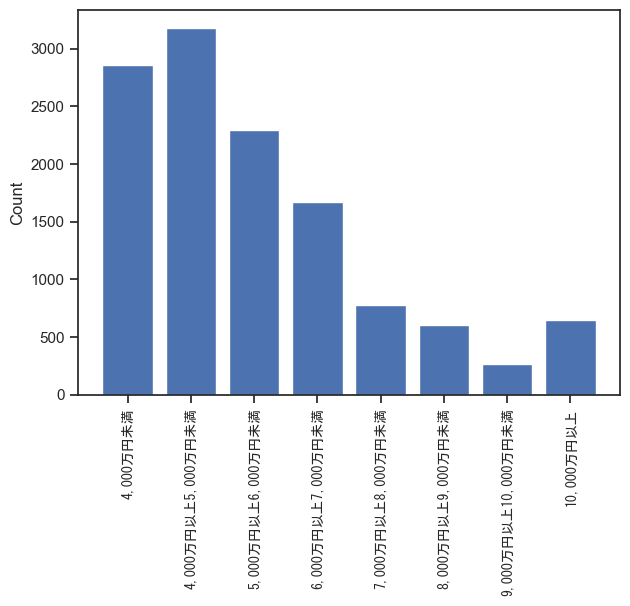

In [6]:
column_sums = df1.sum()
price_range = [unicodedata.normalize('NFKC', i) for i in column_sums.index]

x = list(range(len(price_range)))
y = list(column_sums.values)

plt.figure(figsize=(7,5))
plt.bar(x, y)
plt.xticks(x, price_range, fontname="MS Gothic", fontsize=10, rotation=90)
plt.ylabel('Count')
plt.show()

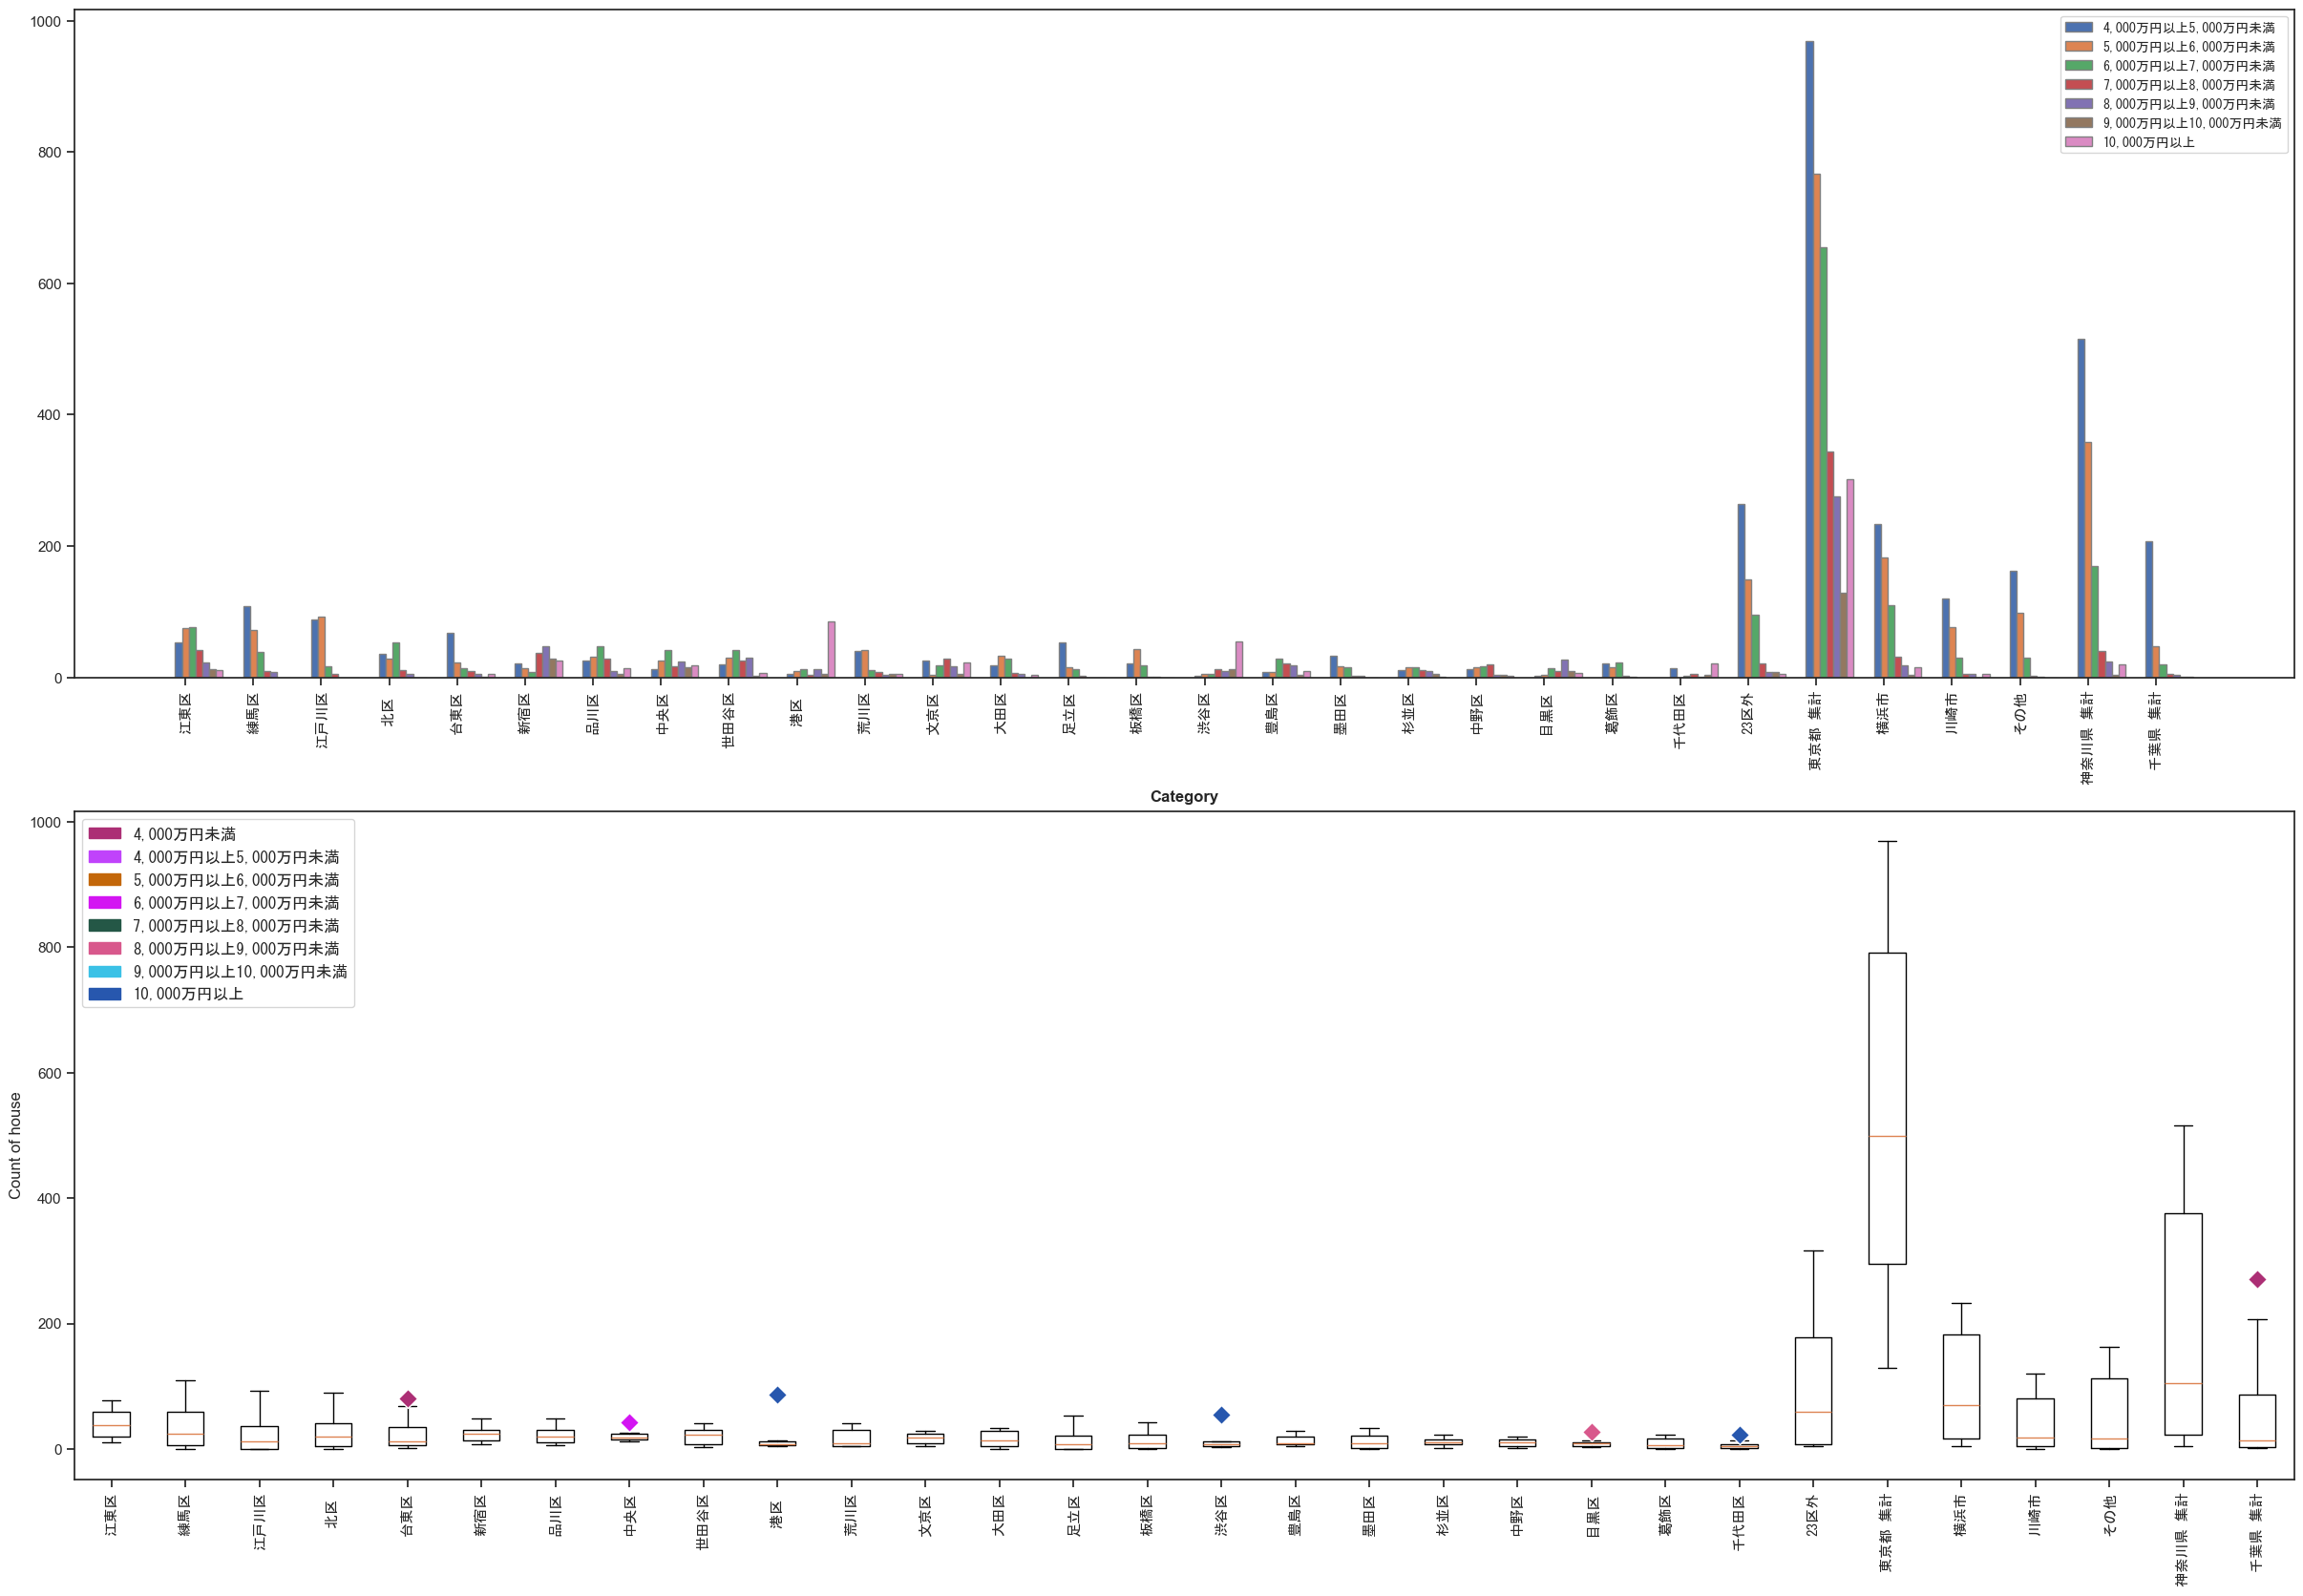

In [7]:
cities = [unicodedata.normalize('NFKC', i[1]) for i in df1.index.tolist()]
n_categories = len(df1)
n_series = len(df1.columns) - 1
bar_width = 0.1
r = np.arange(n_categories)

np.random.seed(0)
colors = [(np.random.choice(range(256), size=3) / 255).tolist() for i in range(len(price_range))]
outliers = []
for data in df1.to_numpy():
    q1, q3 = np.quantile(data, 0.25), np.quantile(data, 0.75)
    iqr = q3-q1
    min_, max_ = q1-(1.5*iqr), q3+(1.5*iqr)
    values = list(data[(data <= min_) | (data >= max_)])
    idx = list(np.where((data <= min_) | (data >= max_))[0])
    outliers.append([(i, j) for i, j in zip(idx, values)])

plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
for i in range(n_series):
    plt.bar(r + i * bar_width, df1[df1.columns[i+1]], width=bar_width, edgecolor='grey', label=df1.columns[i+1])

plt.xlabel('Category', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_categories)], cities, fontname="MS Gothic", rotation=90)
plt.legend(prop={'family':'MS Gothic', 'size':10})

plt.subplot(2,1,2)
plt.boxplot(df1.to_numpy().T)
plt.ylabel('Count of house')
plt.xticks(range(1, df1.shape[0] + 1), cities, fontname="MS Gothic", rotation=90)
for idx, v in enumerate(outliers):
    for i in v:
        plt.plot(idx+1, i[1], marker = 'D', markerfacecolor = colors[i[0]], markersize=10, markeredgecolor=(1, 1, 1, 1))
patch = [mpatches.Patch(color=i, label=j) for i,j in zip(colors, price_range)]
plt.legend(handles=patch, loc="upper left", prop={'size' : 12, 'family': 'MS Gothic'})

plt.show()

In [8]:
inside_23 = cities[:23]
outside_23 = cities[23:]
_, p_value = stats.f_oneway(df1[np.in1d(df1.index.get_level_values(1), inside_23)].to_numpy().reshape(-1), df1[np.in1d(df1.index.get_level_values(1), outside_23)].to_numpy().reshape(-1)) # compare variance of inside and outside 23 yards

print(p_value)

5.68648992614261e-14


# Compact mansion price

In [9]:
df3 = pd.read_excel(data_dir, sheet_name=3, header=1).iloc[:-3,1:-3]
df3['都道府県'].fillna(method='ffill', inplace=True)
df3['市区'] = df3['市区'].fillna(df3['都道府県'])
df3.set_index(['都道府県', '市区'], inplace=True)
df3 = df3.fillna(0).applymap(convert_float_to_int)
df3

400万円未満  400万円以上500万円未満  500万円以上600万円未満  600万円以上700万円未満  \
都道府県    市区                                                                 
東京都     江東区           19              32              46              57   
        練馬区           24              40              63              43   
        江戸川区          34              35              45              32   
        北区　           27              41              48              49   
        台東区           16              35              48              40   
        新宿区            8               9              21              27   
        品川区           14              18              25              20   
        中央区            9              20              21              18   
        世田谷区           8              12              19              24   
        港区　            9               5              10               9   
        荒川区           15              32              25              18   
        文京区            4              11              12              22   
        大田区            8              16              28              17   
        足立区           25              26              21              14   
        板橋区           10              20              28              18   
        渋谷区            2               5               4               9   
        豊島区            7              12              13               8   
        墨田区           12              16              22              15   
        杉並区            4              11              20              19   
        中野区            4              14              15               9   
        目黒区            5               3               7               8   
        葛飾区            5              11              13              11   
        千代田区           1               3               4               9   
        23区外         105             146             193             160   
東京都 集計  東京都 集計       375             573             751             656   
神奈川県    横浜市           67             132             145              99   
        川崎市           40              57              84              46   
        その他           58              83              80              67   
神奈川県 集計 神奈川県 集計      165             272             309             212   
千葉県 集計  千葉県 集計        55             123              98              89   

                 700万円以上800万円未満  800万円以上900万円未満  900万円以上1,000万円未満  \
都道府県    市区                                                          
東京都     江東区                  50              32                22   
        練馬区                  39              28                15   
        江戸川区                 27              21                 7   
        北区　                  19              17                 7   
        台東区                  21              15                 7   
        新宿区                  17              17                21   
        品川区                  26              14                14   
        中央区                  20              15                15   
        世田谷区                 21              24                 5   
        港区　                   6               5                12   
        荒川区                  15              10                 1   
        文京区                  16              16                 8   
        大田区                  18              13                 5   
        足立区                  11               6                 4   
        板橋区                   6               9                 7   
        渋谷区                   8               4                 7   
        豊島区                  12               9                 8   
        墨田区                  14               9                 5   
        杉並区                  12               8                 3   
        中野区                  13               3                 9   
        目黒区                   7               9                 4 

In [10]:
df3.describe()

,400万円未満,400万円以上500万円未満,500万円以上600万円未満,600万円以上700万円未満,700万円以上800万円未満,800万円以上900万円未満,"900万円以上1,000万円未満","1,000万円以上1,100万円未満","1,100万円以上1,200万円未満","1,200万円以上1,300万円未満","1,300万円以上1,400万円未満","1,400万円以上1,500万円未満","1,500万円以上"
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000
mean,37.833333,60.433333,73.933333,60.833333,44.366667,36.100000,21.800000,15.600000,11.000000,9.40000,6.200000,5.066667,27.133333
std,72.703025,112.624087,143.337541,121.643085,86.753906,68.165291,42.794134,31.742064,22.009402,20.15218,14.254824,11.194005,62.156495
min,1.000000,3.000000,4.000000,8.000000,6.000000,2.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,7.250000,11.250000,16.000000,14.250000,12.000000,9.000000,5.500000,5.250000,2.000000,2.25000,2.000000,1.000000,4.750000
50%,13.000000,20.000000,25.000000,21.000000,18.500000,15.000000,8.000000,8.000000,5.000000,4.00000,2.500000,3.000000,14.000000
75%,32.250000,40.750000,59.250000,48.250000,34.000000,27.750000,19.500000,11.000000,10.750000,9.00000,5.750000,4.750000,21.000000
max,375.000000,573.000000,751.000000,656.000000,464.000000,356.000000,233.000000,175.000000,120.000000,112.00000,80.000000,62.000000,348.000000


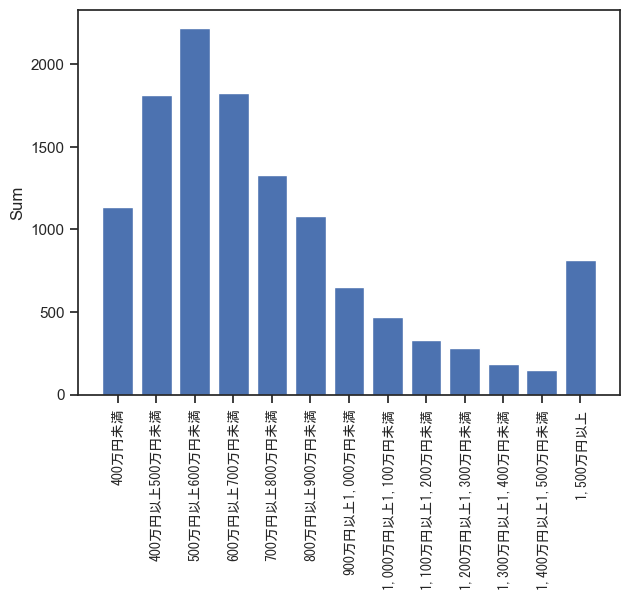

In [11]:
column_sums = df3.sum()
price_range = [unicodedata.normalize('NFKC', i) for i in column_sums.index]

x = list(range(len(price_range)))
y = list(column_sums.values)

plt.figure(figsize=(7,5))
plt.bar(x, y)
plt.xticks(x, price_range, fontname="MS Gothic", fontsize=10, rotation=90)
plt.ylabel('Sum')
plt.show()

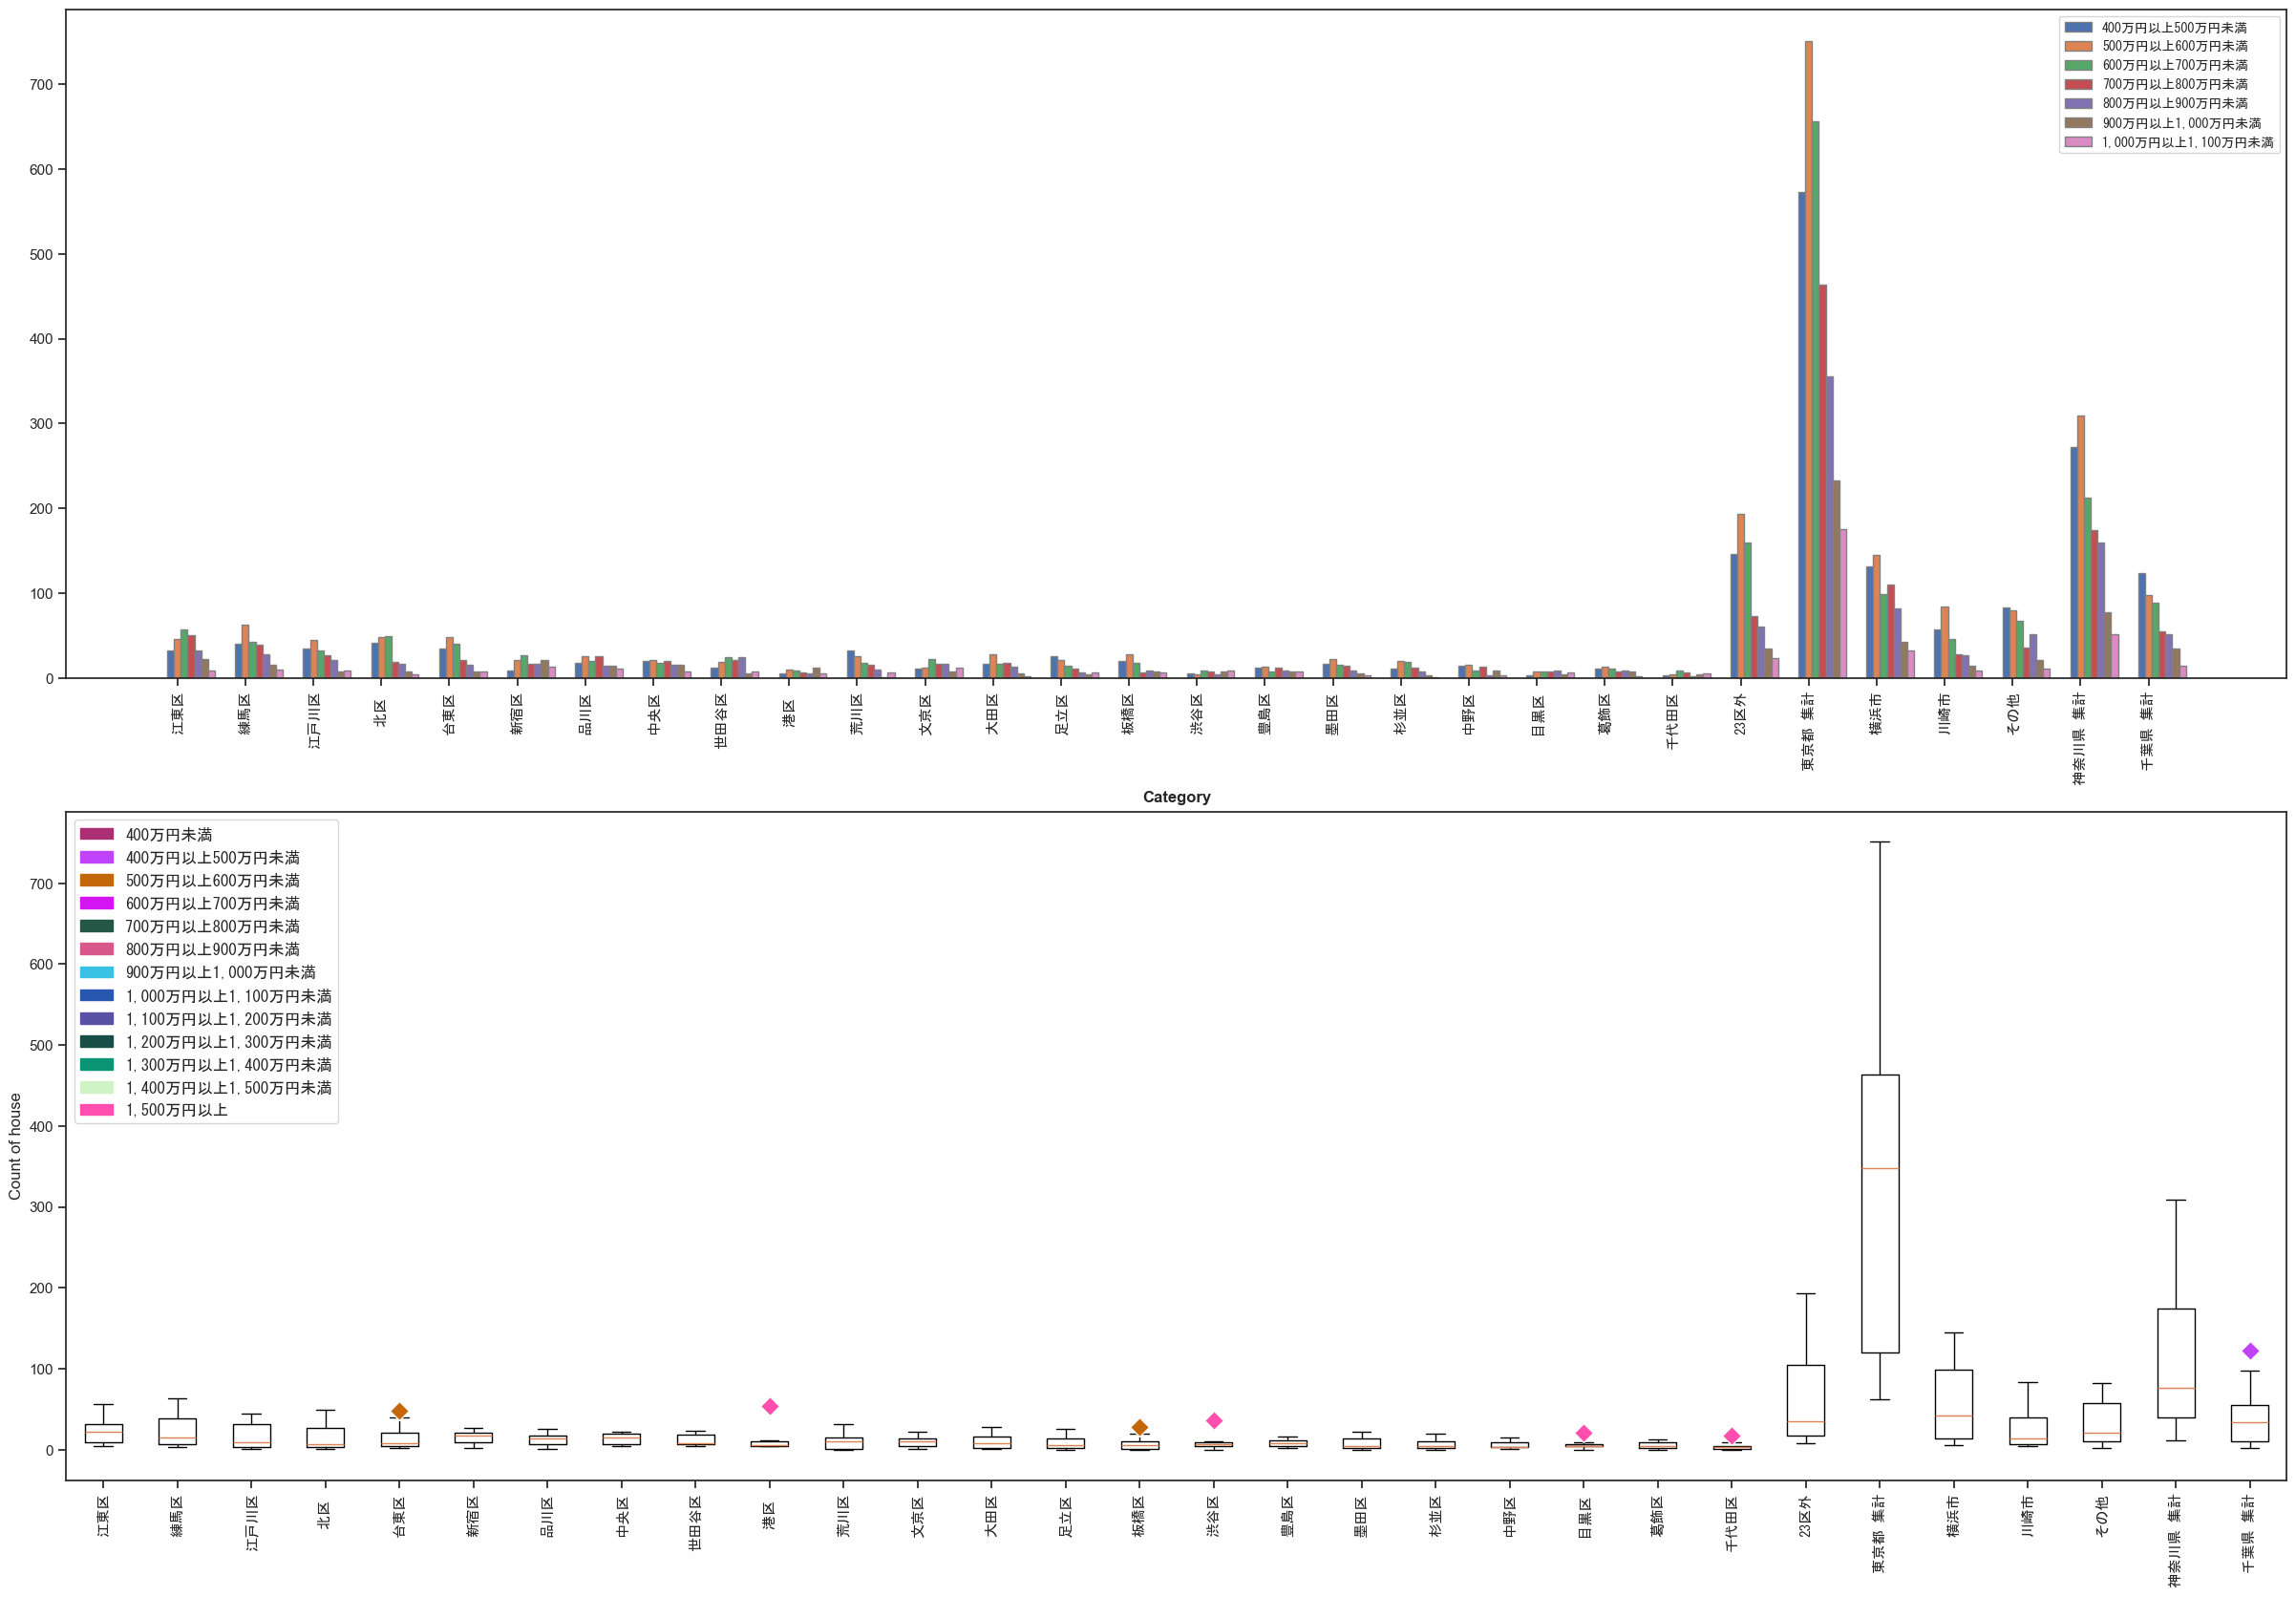

In [12]:
cities = [unicodedata.normalize('NFKC', i[1]) for i in df3.index.tolist()]
n_categories = len(df3)
n_series = len(df1.columns) - 1
bar_width = 0.1
r = np.arange(n_categories)

np.random.seed(0)
colors = [(np.random.choice(range(256), size=3) / 255).tolist() for i in range(len(price_range))]
outliers = []
for data in df3.to_numpy():
    q1, q3 = np.quantile(data, 0.25), np.quantile(data, 0.75)
    iqr = q3-q1
    min_, max_ = q1-(1.5*iqr), q3+(1.5*iqr)
    values = list(data[(data <= min_) | (data >= max_)])
    idx = list(np.where((data <= min_) | (data >= max_))[0])
    outliers.append([(i, j) for i, j in zip(idx, values)])

plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
for i in range(n_series):
    plt.bar(r + i * bar_width, df3[df3.columns[i+1]], width=bar_width, edgecolor='grey', label=df3.columns[i+1])

plt.xlabel('Category', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_categories)], cities, fontname="MS Gothic", rotation=90)
plt.legend(prop={'family':'MS Gothic', 'size':10})

plt.subplot(2,1,2)
plt.boxplot(df3.to_numpy().T)
plt.ylabel('Count of house')
plt.xticks(range(1, df3.shape[0] + 1), cities, fontname="MS Gothic", rotation=90)
for idx, v in enumerate(outliers):
    for i in v:
        plt.plot(idx+1, i[1], marker = 'D', markerfacecolor = colors[i[0]], markersize=10, markeredgecolor=(1, 1, 1, 1))
patch = [mpatches.Patch(color=i, label=j) for i,j in zip(colors, price_range)]
plt.legend(handles=patch, loc="upper left", prop={'size' : 12, 'family': 'MS Gothic'})

plt.show()

In [13]:
inside_23 = cities[:23]
outside_23 = cities[23:]
_, p_value = stats.f_oneway(df3[np.in1d(df3.index.get_level_values(1), inside_23)].to_numpy().reshape(-1), df3[np.in1d(df3.index.get_level_values(1), outside_23)].to_numpy().reshape(-1)) # compare variance of inside and outside 23 yards
print(p_value)

3.1208938105444006e-21


# Compact vs normal mansion

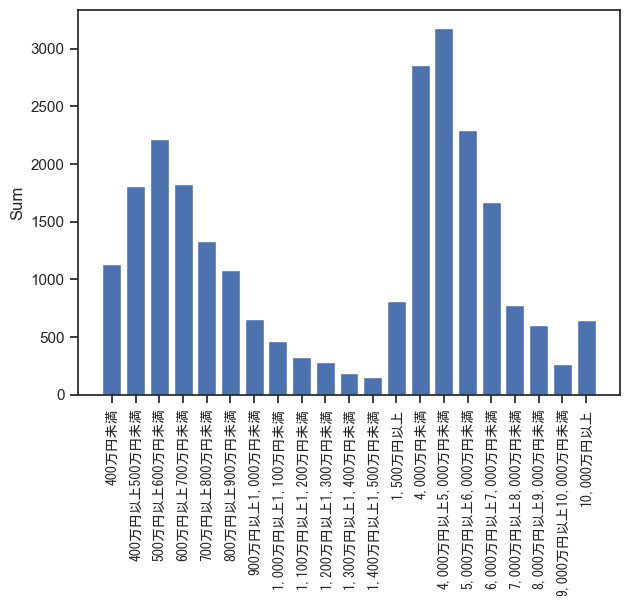

In [14]:
column_sums_compact = df3.sum()
column_sums_normal = df1.sum()

price_range_compact = [unicodedata.normalize('NFKC', i) for i in column_sums_compact.index]
price_range_normal = [unicodedata.normalize('NFKC', i) for i in column_sums_normal.index]

price_range = price_range_compact + price_range_normal

x = list(range(len(price_range_compact) + len(price_range_normal)))
y = list(column_sums_compact.values) + list(column_sums_normal.values)

plt.figure(figsize=(7,5))
plt.bar(x, y)
plt.xticks(x, price_range, fontname="MS Gothic", fontsize=10, rotation=90)
plt.ylabel('Sum')
plt.show()

# Inside vs outside 23 yards

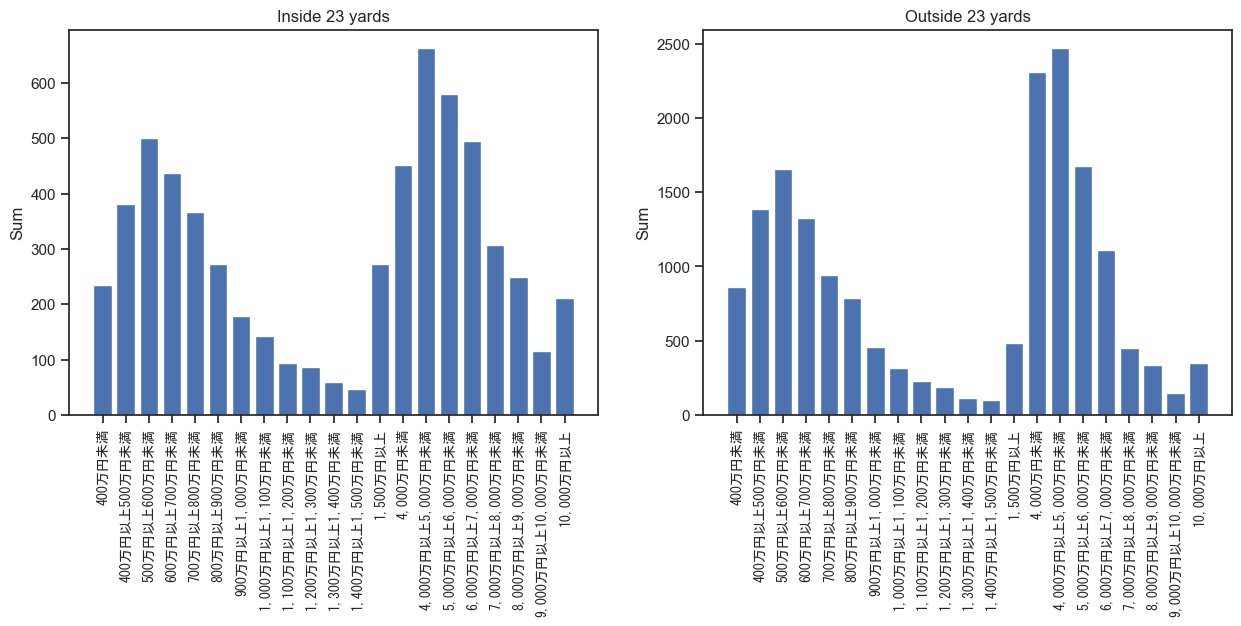

In [15]:
inside_normal = df1[np.in1d(df1.index.get_level_values(1), inside_23)]
inside_compact = df3[np.in1d(df3.index.get_level_values(1), inside_23)]
outside_normal = df1[np.in1d(df1.index.get_level_values(1), outside_23)]
outside_compact = df3[np.in1d(df3.index.get_level_values(1), outside_23)]

inside = pd.merge(inside_compact, inside_normal, how='outer', left_index=True, right_index=True)
outside = pd.merge(outside_compact, outside_normal, how='outer', left_index=True, right_index=True)

column_sums_inside = inside.sum()
price_range_inside = [unicodedata.normalize('NFKC', i) for i in column_sums_inside.index]
x_inside = list(range(len(price_range_inside)))
y_inside = list(column_sums_inside.values)

column_sums_outside = outside.sum()
price_range_outside = [unicodedata.normalize('NFKC', i) for i in column_sums_outside.index]
x_outside = list(range(len(price_range_outside)))
y_outside = list(column_sums_outside.values)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x_inside, y_inside)
plt.xticks(x_inside, price_range_inside, fontname="MS Gothic", fontsize=10, rotation=90)
plt.ylabel('Sum')
plt.title('Inside 23 yards')
plt.subplot(1,2,2)
plt.bar(x_outside, y_outside)
plt.xticks(x_outside, price_range_outside, fontname="MS Gothic", fontsize=10, rotation=90)
plt.ylabel('Sum')
plt.title('Outside 23 yards')
plt.show()

# Superficy

In [16]:
df2 = pd.read_excel(data_dir, sheet_name=2, header=1).iloc[:-2, 2:-3]
df2 = df2[df2['市区'].notna()]
df2 = df2.fillna(0).applymap(convert_float_to_int)
df2

,市区,40㎡未満,40㎡以上50㎡未満,50㎡以上60㎡未満,60㎡以上70㎡未満,70㎡以上80㎡未満,80㎡以上90㎡未満,90㎡以上100㎡未満,100㎡超
0,江東区,55,7,44,146,58,11,3,4
1,練馬区,65,7,40,90,82,7,0,1
2,江戸川区,7,3,17,163,33,0,0,0
3,北区,92,10,48,69,4,0,0,0
4,台東区,104,17,63,16,2,4,0,0
5,新宿区,36,7,22,81,40,4,2,1
6,品川区,36,9,26,78,23,1,0,2
7,中央区,36,4,31,67,24,3,2,2
8,世田谷区,16,5,20,76,34,12,0,0
9,港区,23,9,20,23,35,14,6,12


In [17]:
df2.describe()

,40㎡未満,40㎡以上50㎡未満,50㎡以上60㎡未満,60㎡以上70㎡未満,70㎡以上80㎡未満,80㎡以上90㎡未満,90㎡以上100㎡未満,100㎡超
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,43.333333,9.296296,37.407407,88.444444,30.444444,5.111111,1.259259,2.000000
std,35.947611,11.989787,28.314524,102.725300,34.761089,6.002136,1.933363,3.721042
min,5.000000,0.000000,11.000000,11.000000,2.000000,0.000000,0.000000,0.000000
25%,17.500000,3.500000,20.000000,30.500000,6.500000,0.000000,0.000000,0.000000
50%,36.000000,5.000000,23.000000,49.000000,17.000000,3.000000,0.000000,0.000000
75%,50.500000,9.500000,48.500000,85.500000,34.500000,8.000000,2.000000,2.000000
max,143.000000,59.000000,133.000000,474.000000,123.000000,19.000000,6.000000,15.000000


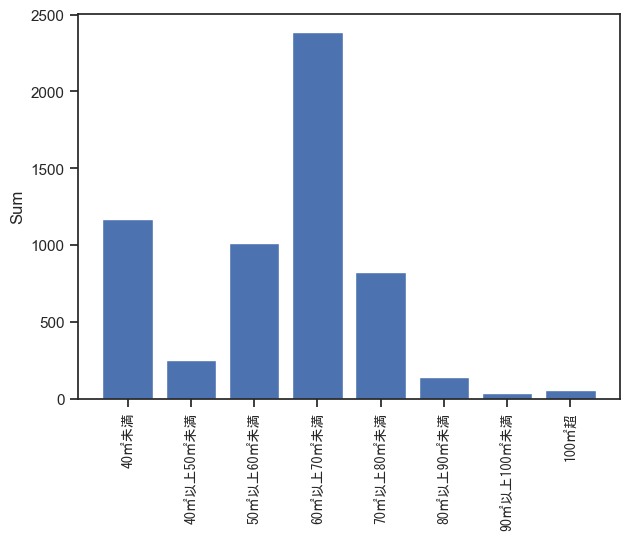

In [18]:
column_sums = df2.iloc[:,1:].sum()
superficy = list(df2.columns.to_numpy()[1:])

x = list(range(len(superficy)))
y = list(column_sums.values)

plt.figure(figsize=(7,5))
plt.bar(x, y)
plt.xticks(x, superficy, fontname="MS Gothic", fontsize=10, rotation=90)
plt.ylabel('Sum')
plt.show()

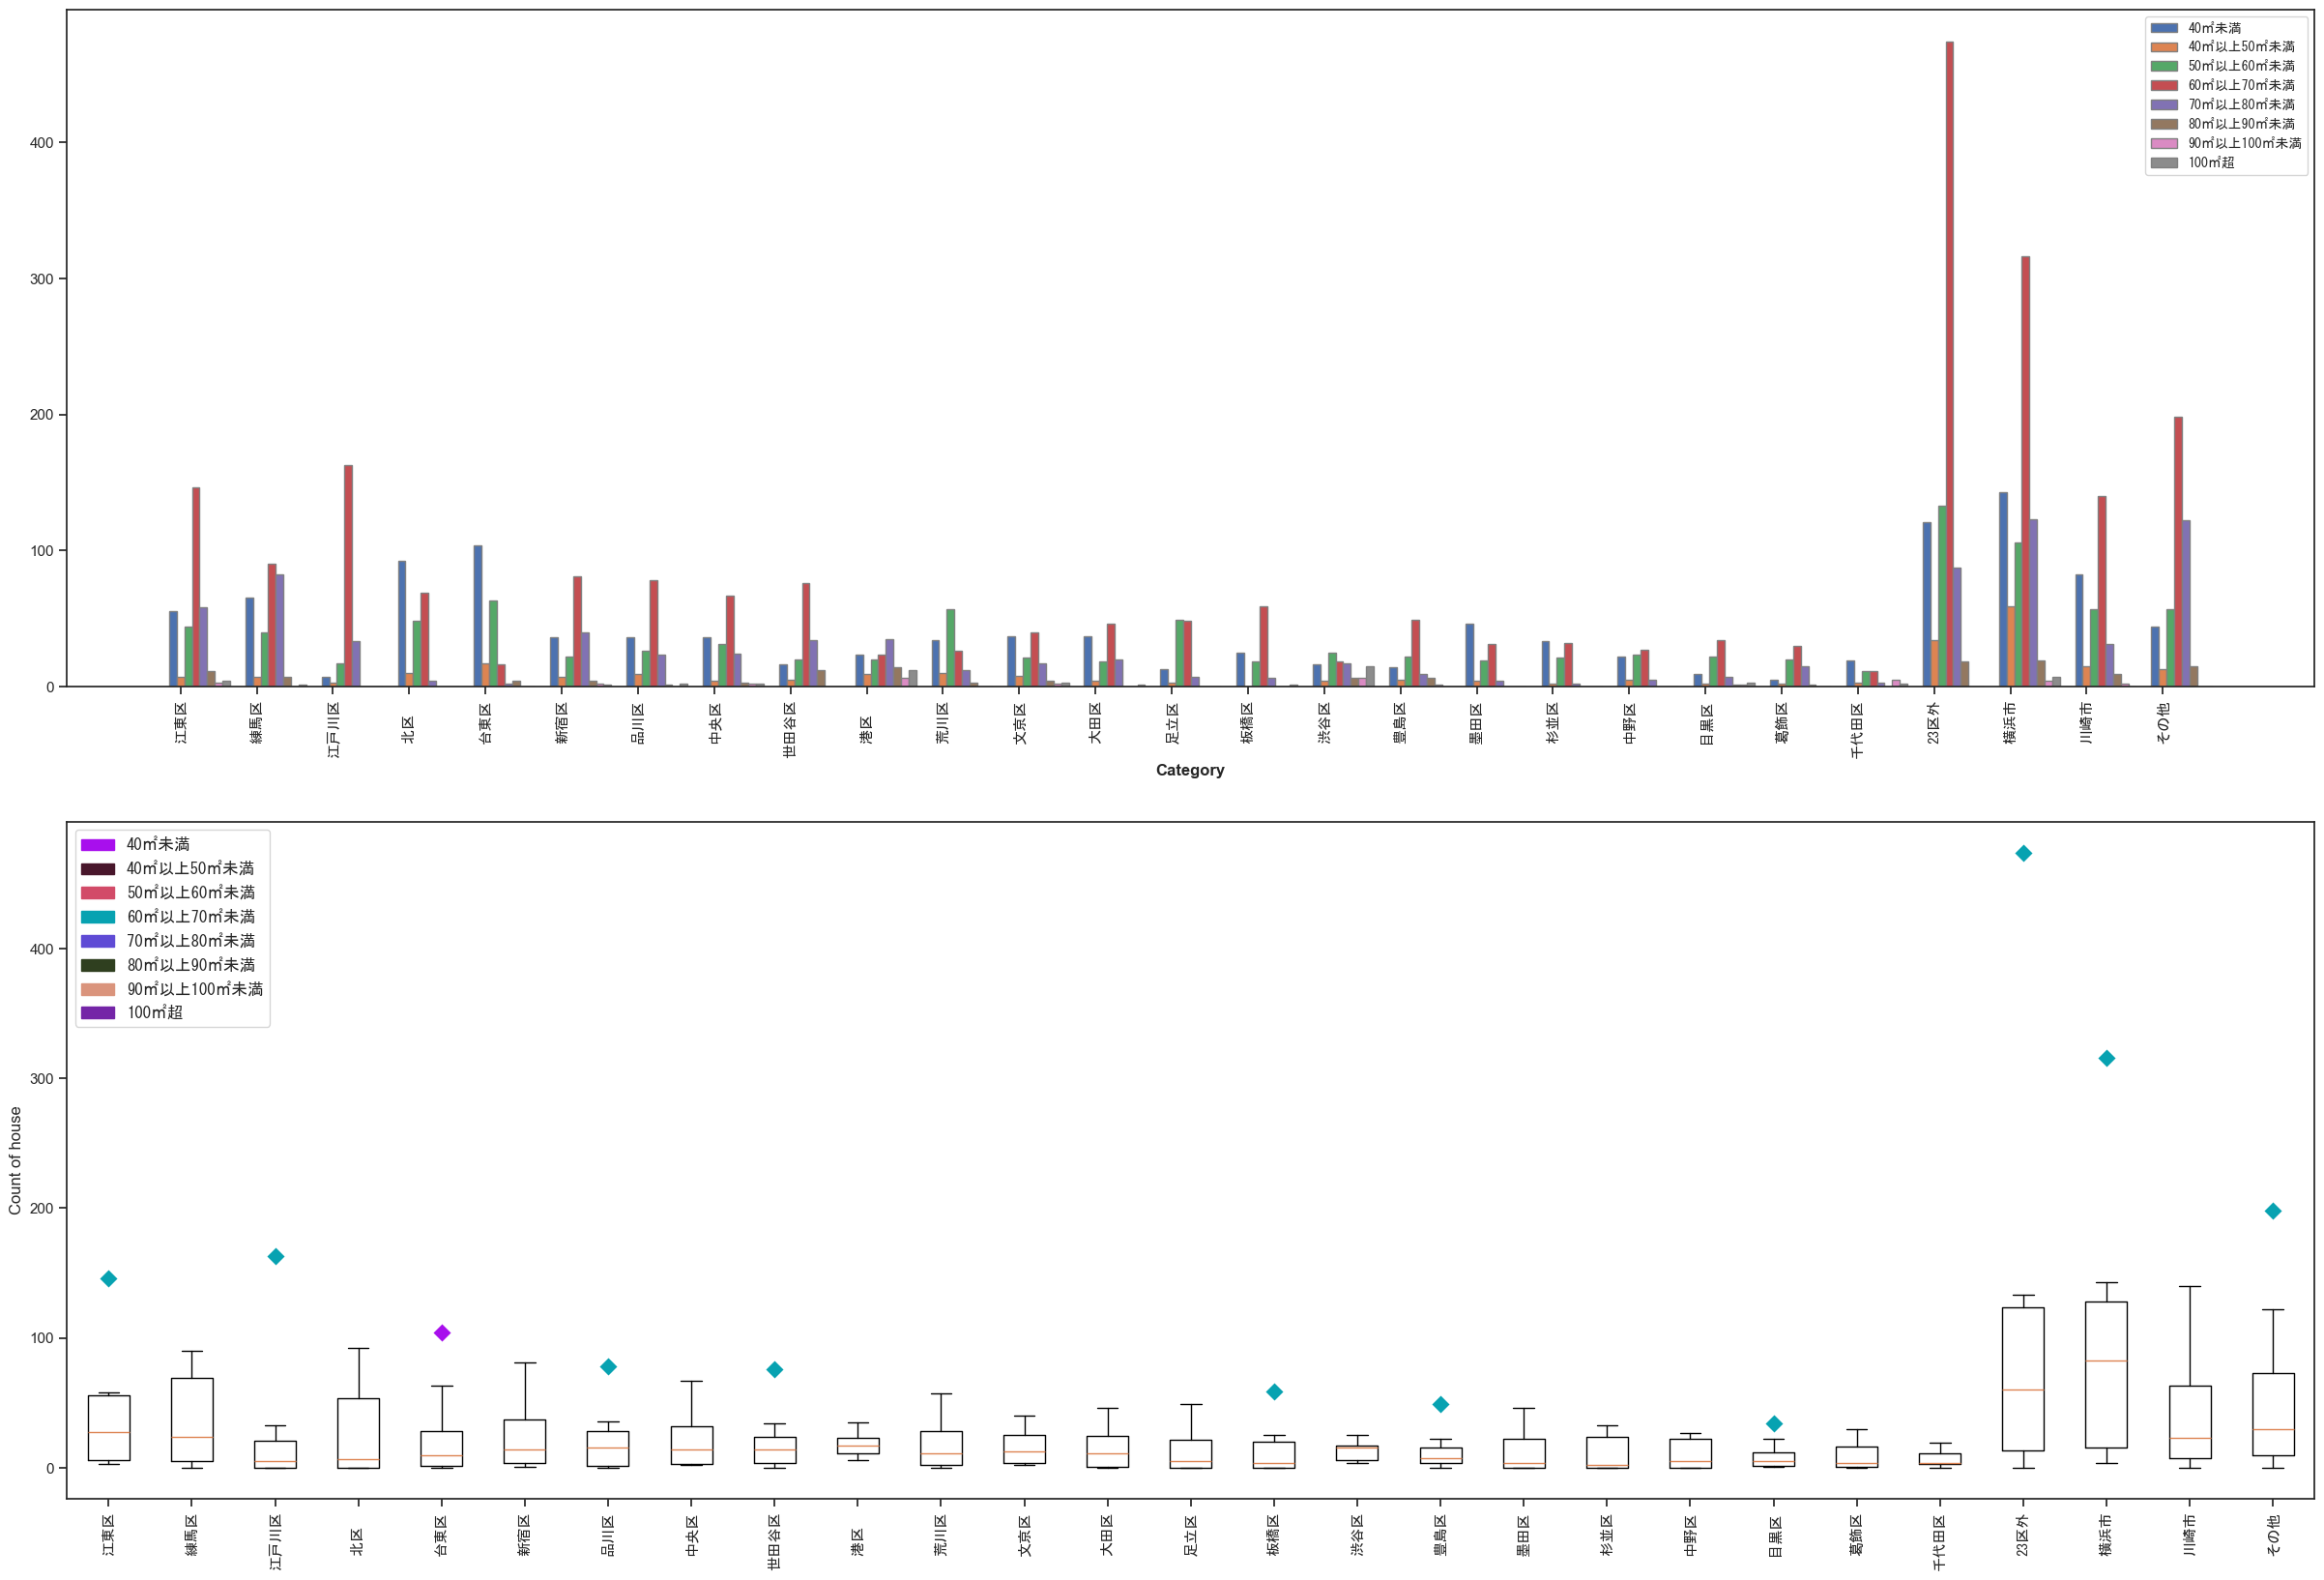

In [19]:
n_categories = len(df2)
n_series = len(df2.columns) - 1
bar_width = 0.1
r = np.arange(n_categories)

np.random.seed(2)
colors = [(np.random.choice(range(256), size=3) / 255).tolist() for i in range(len(superficy))]
outliers = []
for data in df2.to_numpy().T[1:].T:
    q1, q3 = np.quantile(data, 0.25), np.quantile(data, 0.75)
    iqr = q3-q1
    min_, max_ = q1-(1.5*iqr), q3+(1.5*iqr)
    values = list(data[(data <= min_) | (data >= max_)])
    idx = list(np.where((data <= min_) | (data >= max_))[0])
    outliers.append([(i, j) for i, j in zip(idx, values)])

plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
for i in range(n_series):
    plt.bar(r + i * bar_width, df2[df2.columns[i+1]], width=bar_width, edgecolor='grey', label=df2.columns[i+1])

plt.xlabel('Category', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_categories)], df2['市区'], fontname="MS Gothic", rotation=90)
plt.legend(prop={'family':'MS Gothic', 'size':10})

plt.subplot(2,1,2)
plt.boxplot(df2.to_numpy().T[1:])
plt.ylabel('Count of house')
plt.xticks(range(1, df2.shape[0] + 1), df2['市区'], fontname="MS Gothic", rotation=90)
for idx, v in enumerate(outliers):
    for i in v:
        plt.plot(idx+1, i[1], marker = 'D', markerfacecolor = colors[i[0]], markersize=10, markeredgecolor=(1, 1, 1, 1))
patch = [mpatches.Patch(color=i, label=j) for i,j in zip(colors, superficy)]
plt.legend(handles=patch, loc="upper left", prop={'size' : 12, 'family': 'MS Gothic'})

# plt.subplot(3,1,3)
# for lbl, data in zip(df2['市区'], df2.iloc[:,1:].to_numpy()):
#     sns.kdeplot(data, shade=True, label=lbl)
# plt.title('Multiple Kernel Density Estimates')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.legend(prop={'family':'MS Gothic', 'size':10})

plt.show()

In [20]:
inside_23 = df2['市区'][:22]
outside_23 = df2['市区'][22:]
_, p_value = stats.f_oneway(df2[df2['市区'].isin(inside_23)].to_numpy()[:,1:].reshape(-1), df2[df2['市区'].isin(outside_23)].to_numpy()[:,1:].reshape(-1)) #
print(p_value)

4.7090255253797446e-07
